<a href="https://colab.research.google.com/github/dev-bhaveshye/Machine-Learning/blob/main/Log_Transformer_(_function_transformer_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

!pip install scikit_learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-92-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [ ]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [ ]:
x.isnull().sum()

,0
Age,0
Fare,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<ipython-input-97-eddb82440d97>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
<ipython-input-97-eddb82440d97>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Age']))


<Axes: xlabel='Age', ylabel='Density'>

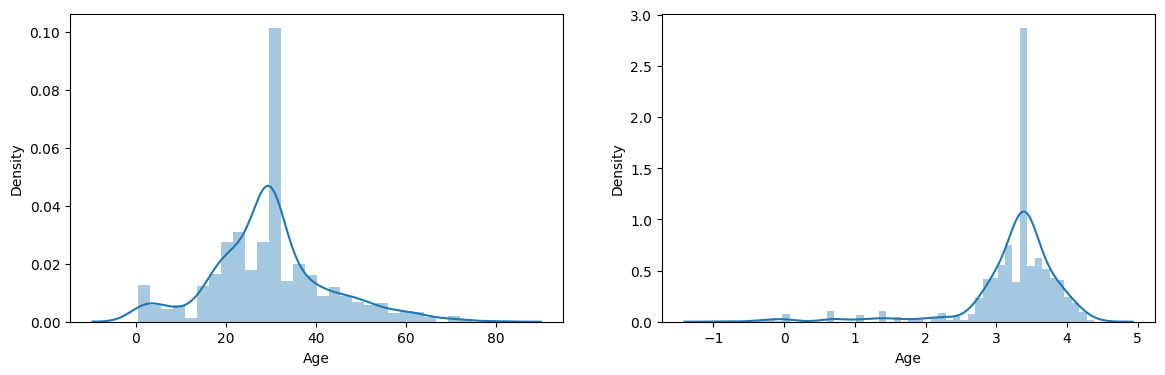

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Age'])
plt.subplot(122)
sns.distplot(np.log(df['Age']))



<ipython-input-98-5c416cdc62d0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])
<ipython-input-98-5c416cdc62d0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df['Fare']))


<Axes: xlabel='Fare', ylabel='Density'>

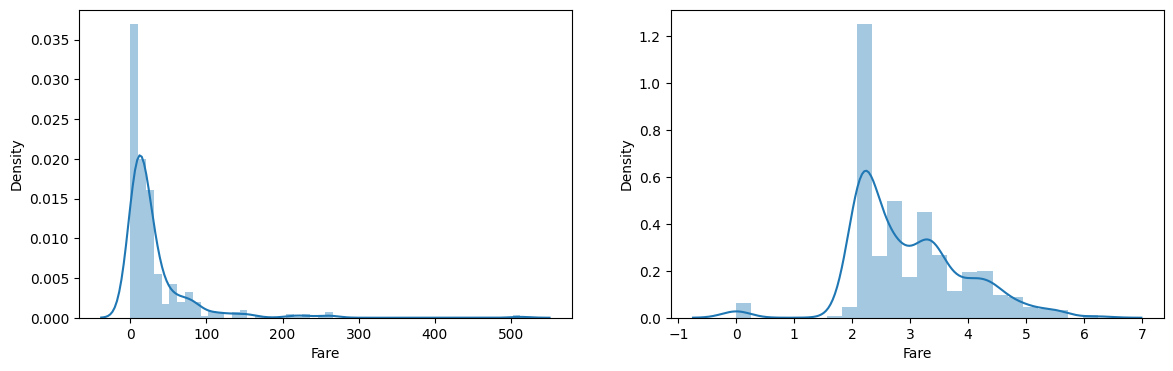

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.subplot(122)
sns.distplot(np.log1p(df['Fare']))

Text(0.5, 1.0, 'Age QQ Plot')

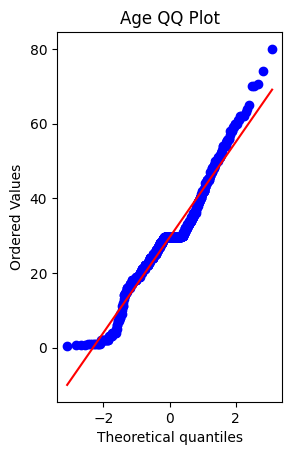

In [ ]:
plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')



Text(0.5, 1.0, 'np.log Age QQ Plot')

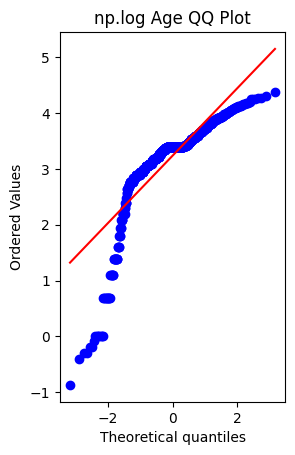

In [ ]:
plt.subplot(122)
stats.probplot(np.log(df['Age']), dist="norm", plot=plt)
plt.title('np.log Age QQ Plot')

Text(0.5, 1.0, 'Fare QQ Plot')

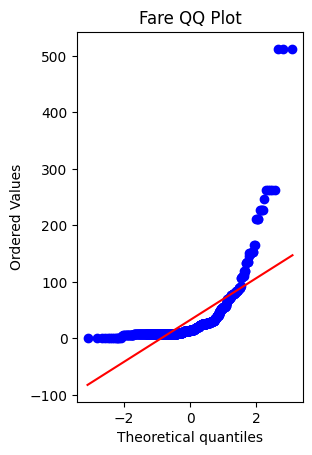

In [ ]:
plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

Text(0.5, 1.0, 'np.log Fare QQ Plot')

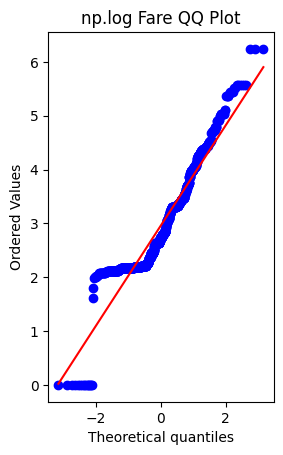

In [ ]:
plt.subplot(122)
stats.probplot(np.log1p(df['Fare']), dist="norm", plot=plt)
plt.title('np.log Fare QQ Plot')

In [ ]:
x_train['Fare']=np.log1p(x_train['Fare'])
x_test['Fare']=np.log1p(x_test['Fare'])

In [ ]:
'''x_train['Fare'].fillna(x_train['Fare'].mean(),inplace=True)
x_test['Fare'].fillna(x_test['Fare'].mean(),inplace=True)'''

<ipython-input-85-93523b733461>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Fare'].fillna(x_train['Fare'].mean(),inplace=True)
<ipython-input-85-93523b733461>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6703910614525139